## Performing Clustering

In [1313]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1314]:
#Loading the dataset into a variable
df=pd.read_csv("D:/UpGrad/HELP_NGO/Country-data.csv")

#### Performing first hand checks

In [1315]:
#Checking top few rows
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1316]:
#Checking dimensions
df.shape

(167, 10)

In [1317]:
df.size

1670

In [1318]:
#Checking columns and their information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [1319]:
#We could observe that there are no null values in the given 10 columns. To confirm let's check them

In [1320]:
df.isnull().sum()/len(df.index)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [1321]:
#Thus we confirmed that there are no null values in the dataset

In [1322]:
#Checking statistics for the data
round(df.describe(),2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


### Performing Univariate & Bivariate Analysis

In [1323]:
#Let's check the correlation of the columns with each other
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Figure size 1440x720 with 0 Axes>

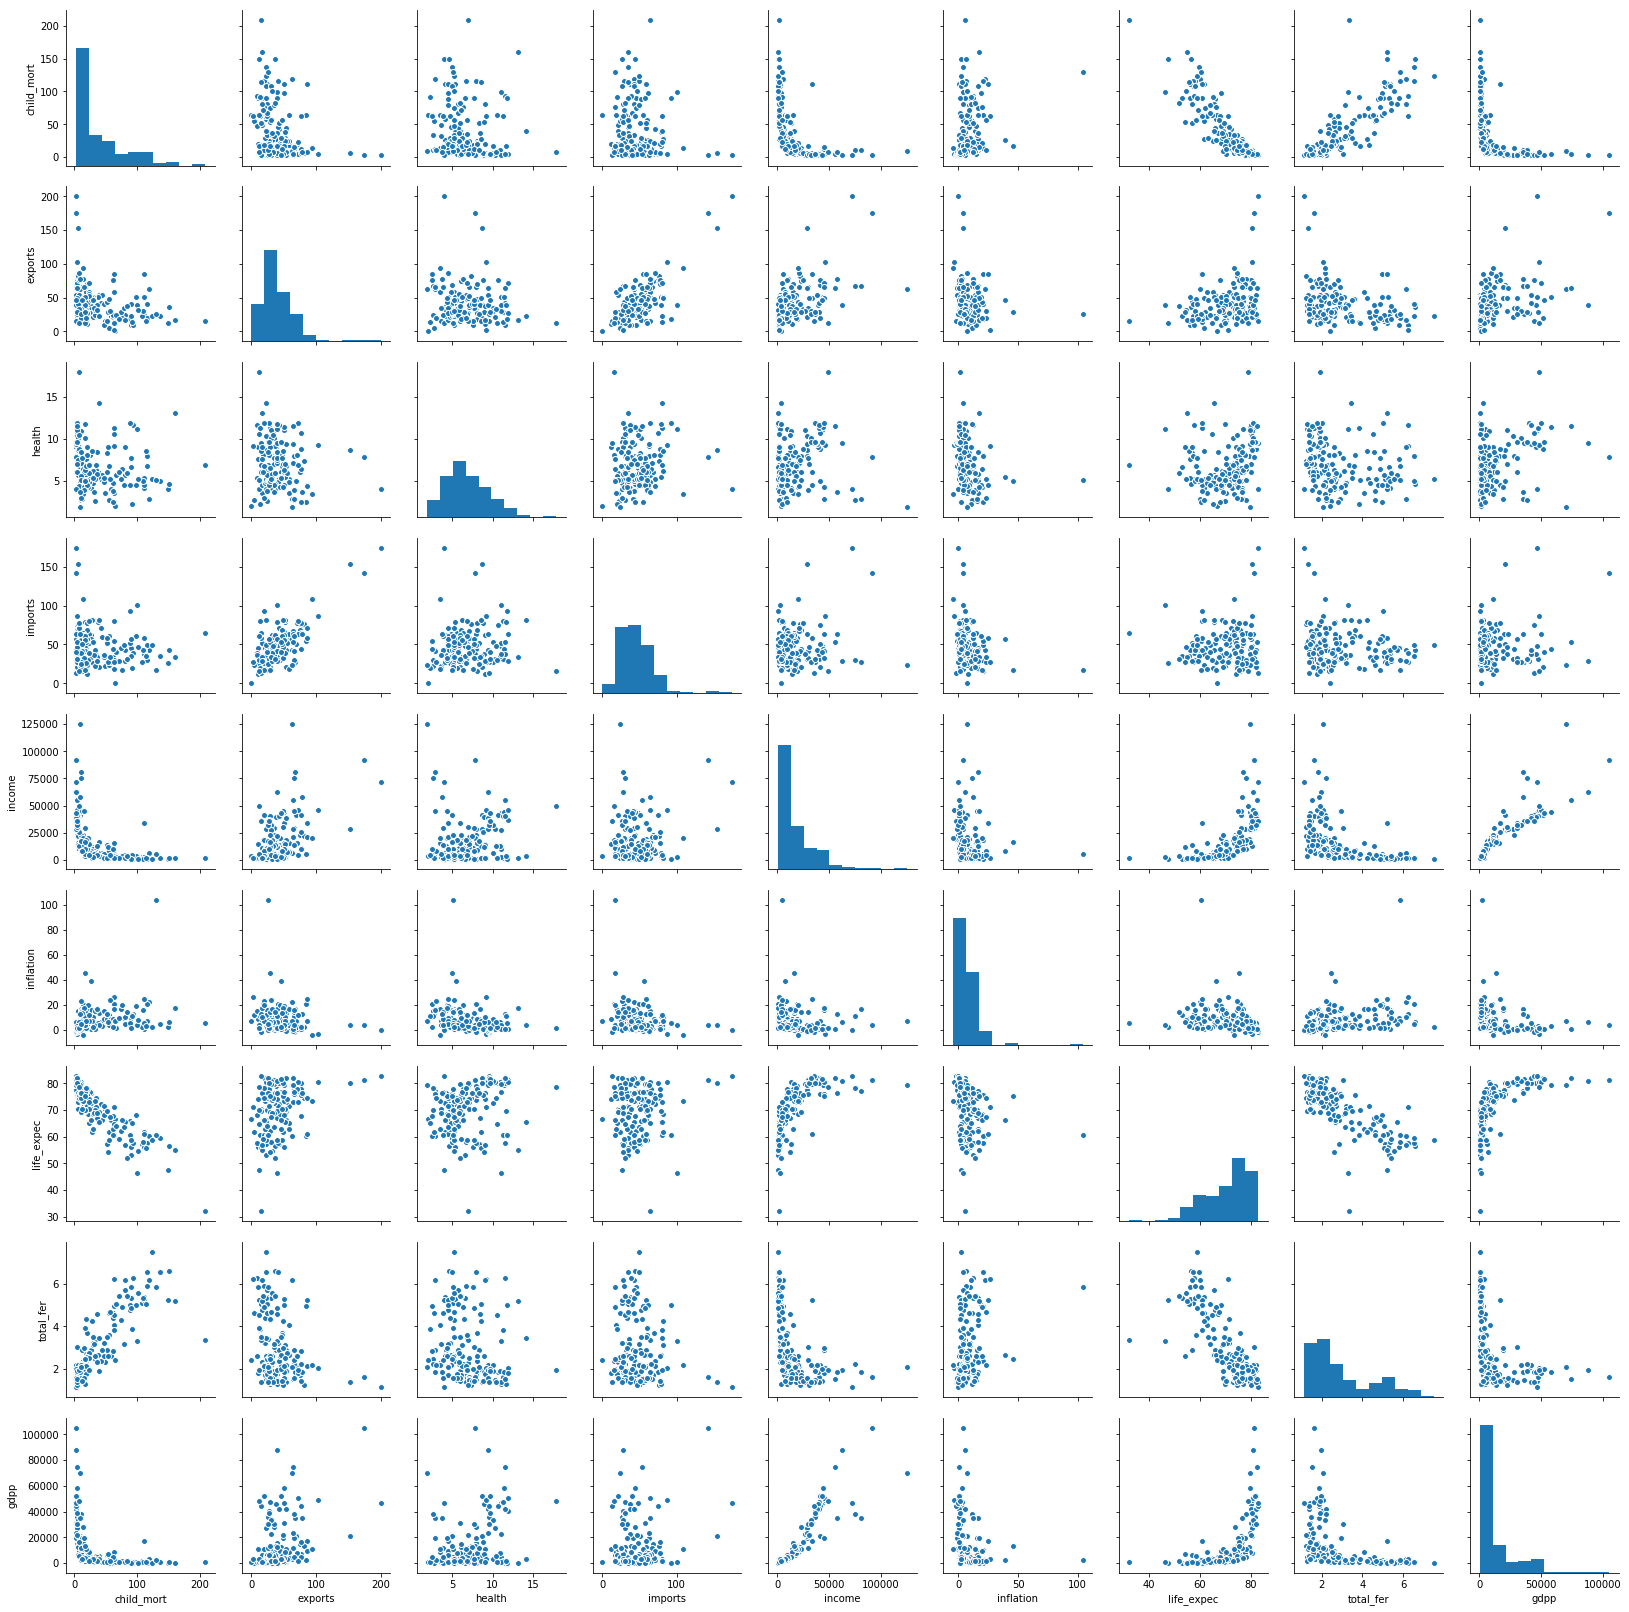

In [1324]:
#Checking correlation graphically
plt.figure(figsize=[20,10])
sns.pairplot(df)
plt.show()

#### Inferences to draw from the Pairplot
- Child Mortality rate and Life expectancy rate have inverse relationship, i.e. on increase of Child mortality rate, there'll be a decrease in life expectancy. This is believable as life expectancy tends to reduce if infants are killed at a high rate.
- Child Mortality rate and Fertility rate are highly correlated, i.e. increase in Fertility rate would in turn increase Child mortality rate as a high fertility rate means high number of infants born and therefore may mean a higher possibility of child abortion.
- Exports and Imports do show a positive correlation, i.e. higher the number of exports, higher is the number of imports. This can be a result of a country exporting goods and then importing something in return from the country, it exported it's goods.
- Income and GDP are positively correlated and is justified as the people with higher income means that they're well to do and the economy is not crunching and is in turn leading to a higher GDP.

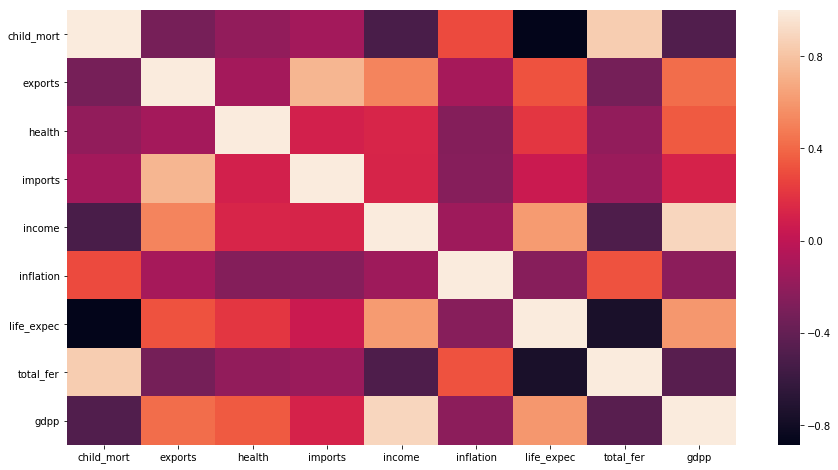

In [1325]:
#Using heatmap to show the correlation
plt.figure(figsize=[15,8])
sns.heatmap(df.corr())
plt.show()

### Let's check each variable and look for it's statistics

In [1326]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1327]:
#Checking exports
df.exports.describe()

count    167.000000
mean      41.108976
std       27.412010
min        0.109000
25%       23.800000
50%       35.000000
75%       51.350000
max      200.000000
Name: exports, dtype: float64

We need to understand that the values for exports are in percentages. So we need to convert them back to usual numbers.

In [1328]:
#Convertion
df['exports']=df['exports']*(df['gdpp']/100)

In [1329]:
df.exports.head()

0      55.30
1    1145.20
2    1712.64
3    2199.19
4    5551.00
Name: exports, dtype: float64

In [1330]:
df.exports.describe()

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64

We could observe that the difference between the maximum value and the 75% quartile is too high. Thus outlier exists!

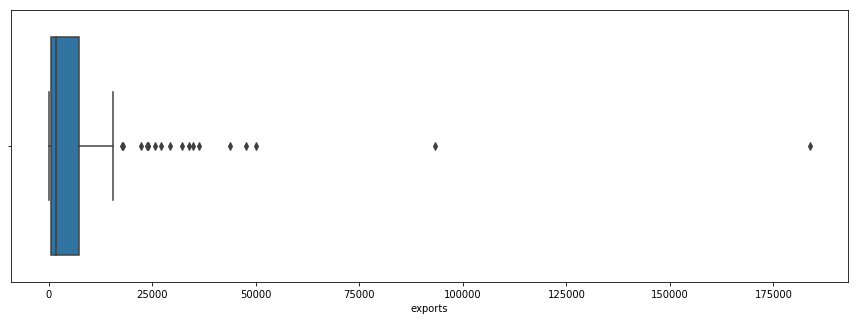

In [1331]:
#Using visualisation to confirm the Outlier
plt.figure(figsize=[15,5])
sns.boxplot(df.exports)
plt.show()

#### As we observed in both, numerically as well as graphically that outliers exists in exports. It is believable that some countries may have more interaction with other countries and therefore the high exports value. We however need to treat these outliers as they will affect our clustering.

In [1332]:
#Declaring upper bound for outlier identification
highexp=0.75
bounds=(df.exports.quantile([highexp]))
bounds

0.75    7278.0
Name: exports, dtype: float64

In [1333]:
#Noting down the outliers in true_exp
true_exp=(df.exports.values<bounds.loc[highexp])
fale_exp=~true_exp

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


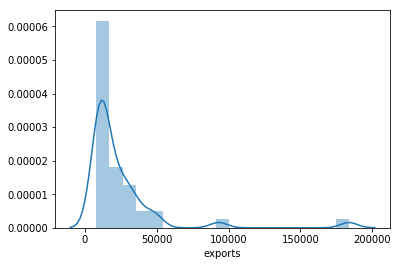

In [1334]:
#Understanding outliers
sns.distplot(df.exports[fale_exp])

In [1335]:
#Computing mean of outliers
df.exports[fale_exp]=df.exports[fale_exp].mean()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


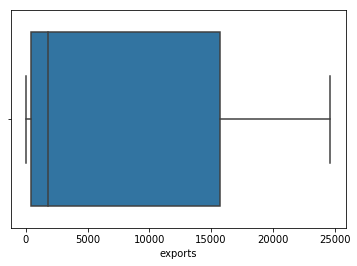

In [1336]:
#Confirming change
sns.boxplot(df.exports)

In [1337]:
#Let's move to Imports column now
#Imports columns needs to be made into whole numbers from percentages
df['imports']=df['imports']*(df['gdpp']/100)

In [1338]:
df.imports.describe()

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
max      149100.000000
Name: imports, dtype: float64

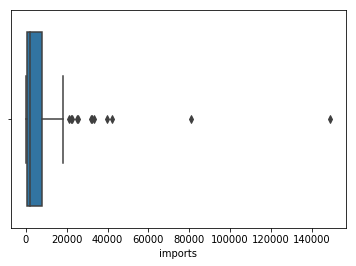

In [1339]:
#There is a significant difference between 75% and Maximum value. Thus we do have an outlier. 
#Checking graphically
sns.boxplot(df.imports)

In [1340]:
#Declaring lower and upper bounds for outlier identification
highimp=0.75
bounds=(df.imports.quantile([highimp]))
bounds

#Noting down the outliers in true_exp
true_imp=(df.imports.values<bounds.loc[highimp])
fale_imp=~true_imp

In [1341]:
#Outliers
df.imports[fale_imp]

7       10847.1
8       22418.2
10      12236.0
11      10536.3
13       7792.0
15      33166.8
23       9884.0
29      14694.0
42      17710.0
43      12454.2
44      25288.0
49      10071.9
51      10030.2
53      17278.8
54      11408.6
58      15507.8
60       8258.3
67      10021.5
68      18142.7
73      42125.5
74      10067.4
75       9737.6
82      11704.0
90       8064.0
91     149100.0
98      32494.0
110     31990.8
111      9436.0
114     25023.0
115      7951.6
122      8415.0
123     16731.4
131     11664.0
133     81084.0
134     12914.8
135     14718.6
138     10210.2
139      8227.6
144     21204.7
145     39761.8
157     22260.0
158     11981.2
Name: imports, dtype: float64

In [1342]:
#Computing mean of outliers
df.imports[fale_imp]=df.imports[fale_imp].mean()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


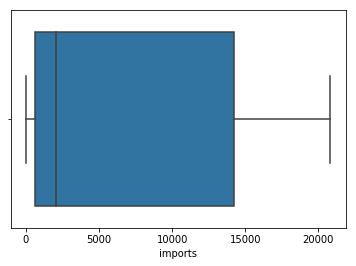

In [1343]:
#Confirming that the outliers have been eliminated
sns.boxplot(df.imports)

In [1344]:
#Checking health
df.health.head()

0    7.58
1    6.55
2    4.17
3    2.85
4    6.03
Name: health, dtype: float64

In [1345]:
#Converting health values to actual numbers from percentages
df['health']=df['health']* (df['gdpp']/100)

In [1346]:
df.health.describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

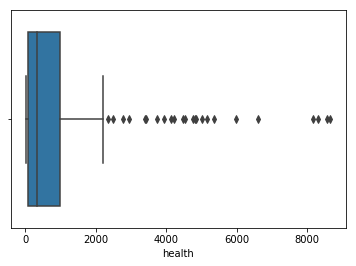

In [1347]:
#Checking graphically
sns.boxplot(df.health)

In [1348]:
#We will now deal with the outliers for health
trueout=(df.health>df.health.quantile(0.75))
df.health[trueout]

7      4530.87
8      5159.00
10     2209.20
11     1028.79
13     1275.20
15     4750.80
22     1009.12
23     1002.52
29     5356.20
33     1026.84
41     1047.60
42     1838.76
43     1560.24
44     6612.00
53     4134.90
54     4831.40
58     4848.80
60     2770.70
68     3938.60
73     4475.53
74     2334.78
75     3411.74
77     4223.05
82     1012.55
91     8158.50
98     1825.15
110    5985.70
111    3403.70
114    8323.44
122    2475.00
123    1272.43
133    1845.36
134    1459.14
135    2201.94
138    1531.53
139    2928.78
144    5017.23
145    8579.00
157    1281.00
158    3749.96
159    8663.60
160     993.65
Name: health, dtype: float64

In [1349]:
#Computing mean of Outliers
df.health[trueout]=np.mean(df.health[trueout])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


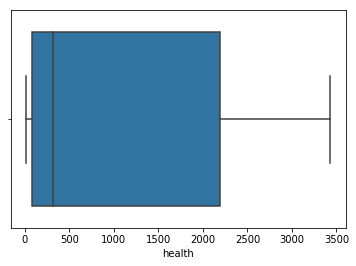

In [1350]:
#Verifying the Outlier elimination
sns.boxplot(df.health)

In [1351]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [1352]:
#Checking Child_mort
df.child_mort.describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [1353]:
#We do find a significance difference between 75% quantile and the maximum, stating that the column has an outlier.
#Let's plot a boxplot

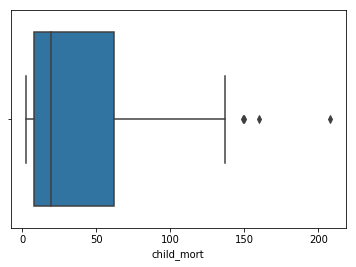

In [1354]:
sns.boxplot(df.child_mort)

Thus, It is evident that we have outliers. Outliers in Child mortality are basically the countries that not well to-do and therefore I prefer to skip the outlier treatment for this column

In [1355]:
#Checking Income column
df.income.describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

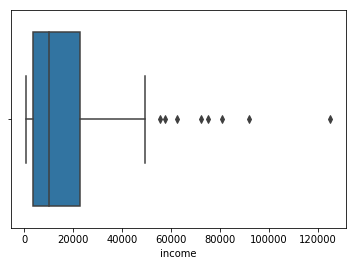

In [1356]:
#The numbers clearly show that there are outliers in the income column. Let's plot a boxplot for better understanding.
sns.boxplot(df.income)

In [1357]:
#We will now deal with the outliers for health
trueout=(df.income>df.income.quantile(0.76)).sort_values(ascending=True)
df.income[trueout]

7       41400
8       43200
11      41100
15      41100
23      80600
29      40700
42      33900
43      28300
44      44000
49      33700
53      39800
54      36900
58      40400
60      28700
68      38800
73      45700
74      29600
75      36200
77      35800
82      75200
89      29600
91      91700
98      28300
110     45500
111     32300
114     62300
115     45300
122     27200
123    125000
128     45400
133     72100
134     25200
135     28700
138     30400
139     32500
144     42900
145     55500
157     57600
158     36200
159     49400
Name: income, dtype: int64

In [1358]:
#Computing mean
df.income[trueout]=df.income[trueout].mean()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


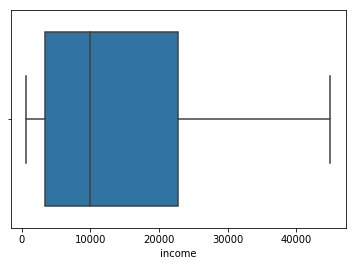

In [1359]:
#Verifying change
sns.boxplot(df.income)

In [1360]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [1363]:
#Grouping the numerical variables for clustering
grouped_df=df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

In [1364]:
grouped_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Performing Rescaling

In [1365]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [1366]:
#Initialising scaler
scaler=StandardScaler()
grouped_scaled=scaler.fit_transform(grouped_df)

In [1367]:
grouped_scaled.shape

(167, 9)

In [1368]:
grouped_scaled=pd.DataFrame(grouped_scaled)

In [1369]:
grouped_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.728988,-0.728551,-0.755637,-0.935065,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.621114,-0.566318,-0.548322,-0.434267,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.564951,-0.625125,-0.618319,-0.255496,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.516795,-0.686418,-0.604740,-0.676841,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.185047,-0.230503,0.071207,0.117694,-0.601749,0.704258,-0.541946,-0.041817


In [1370]:
grouped_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

In [1371]:
grouped_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.728988,-0.728551,-0.755637,-0.935065,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.621114,-0.566318,-0.548322,-0.434267,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.564951,-0.625125,-0.618319,-0.255496,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.516795,-0.686418,-0.604740,-0.676841,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.185047,-0.230503,0.071207,0.117694,-0.601749,0.704258,-0.541946,-0.041817


### Hopkins Statistics

In [1482]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1499]:
print("Hopkins Statistics Score is: {0}".format(hopkins(grouped_scaled)))

Hopkins Statistics Score is: 0.921751134885906


__Hopkins Statistics Score is above 0.7, thus we could infer that the data does have a high tendency to form a cluster.__

### Modelling

In [1372]:
from sklearn.cluster import KMeans

In [1373]:
#Finding optimum number of clusters using sum of squared distance.

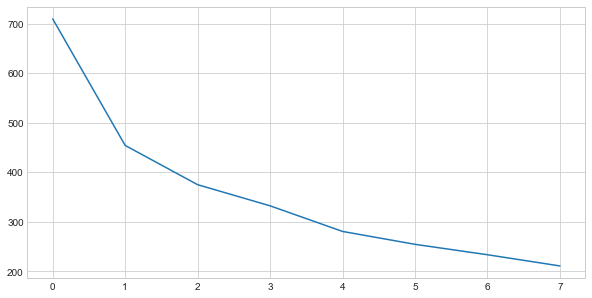

In [1514]:
#elbow curve
sns.set_style('whitegrid')
plt.figure(figsize=[10,5])
range_m=[2,3,4,5,6,7,8,9]
ssd=[]
for i in range_m:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(grouped_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.show()

- With elbow curve method, we could infer that the sum of squared distances is extremely high for 2 clusters. It decreases significantly with an additional cluster.
- When we have 3 clusters, the ssd did not drop that significantly. I'd therefore choose 3 clusters and to confirm if 3 clusters are optimum, let's find silhouette score

In [1375]:
#Checking how perfect are these clusters that we've made
from sklearn.metrics import silhouette_score

In [1378]:
for i in range_m:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(grouped_scaled)
    clus_label=kmeans.labels_
    sil=silhouette_score(grouped_scaled,clus_label)
    print("For n cluster={0}, the silhouette score is {1}".format(i,sil))

For n cluster=2, the silhouette score is 0.5271051754280778
For n cluster=3, the silhouette score is 0.4659769167124918
For n cluster=4, the silhouette score is 0.46495851174674113
For n cluster=5, the silhouette score is 0.34352712095485066
For n cluster=6, the silhouette score is 0.35447106820595536
For n cluster=7, the silhouette score is 0.3413684446404277
For n cluster=8, the silhouette score is 0.28306330286564957
For n cluster=9, the silhouette score is 0.2989275632422966


In [1379]:
#From elbow curve, we considered 3 clusters were optimum, and now the silhoutte score for 3 clusters is 0.47.
#Thus we proceed with 3 clusters

In [1380]:
#Performing clustering with 3 clusters
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(grouped_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1381]:
#Checking labels
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [1382]:
#Adding the clusters to our dataframe
df['Cluster_ID']=kmeans.labels_

In [1383]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


### Checking summary statistics

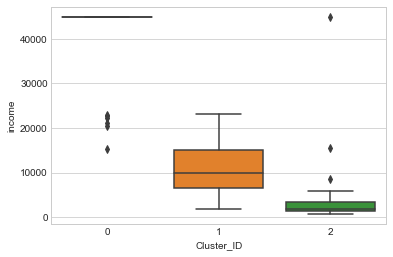

In [1515]:
#Checking Income
sns.boxplot(x=df.Cluster_ID,y=df.income)

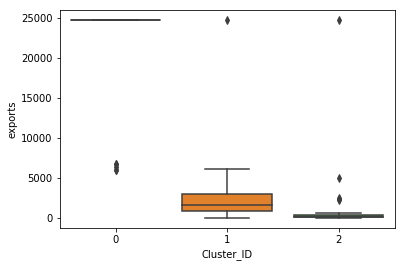

In [1385]:
sns.boxplot(x=df.Cluster_ID,y=df.exports)

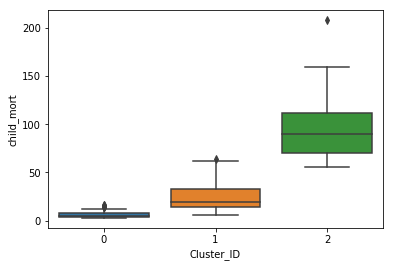

In [1386]:
sns.boxplot(x=df.Cluster_ID,y=df.child_mort)

We could observe that for a cluster with Cluster_ID 2, the Income and Exports is the least, indicating the countries in this cluster aren't well to-do and also do not have much of an interaction with rest of the world. Also, child mortality rate is extremely high indicating that there isn't healthy population to reap the country's resources and add value to the Country's GDP.

In [1392]:
### Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [1393]:
grouped_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.728988,-0.728551,-0.755637,-0.935065,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.621114,-0.566318,-0.548322,-0.434267,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.564951,-0.625125,-0.618319,-0.255496,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.516795,-0.686418,-0.604740,-0.676841,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.185047,-0.230503,0.071207,0.117694,-0.601749,0.704258,-0.541946,-0.041817


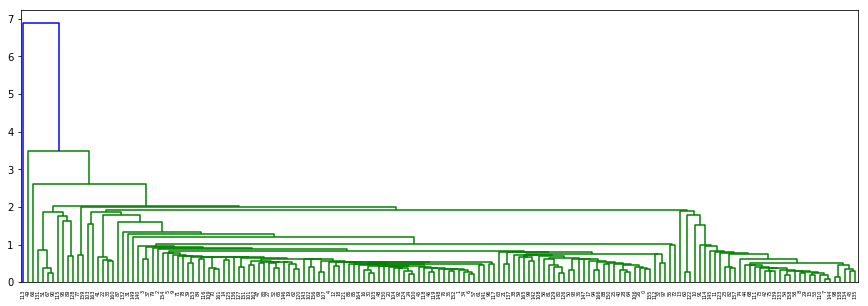

In [1400]:
#Single linkage
mergings= linkage(grouped_scaled,method='single',metric='euclidean')
plt.figure(figsize=[15,5])
dendrogram(mergings)
plt.show()

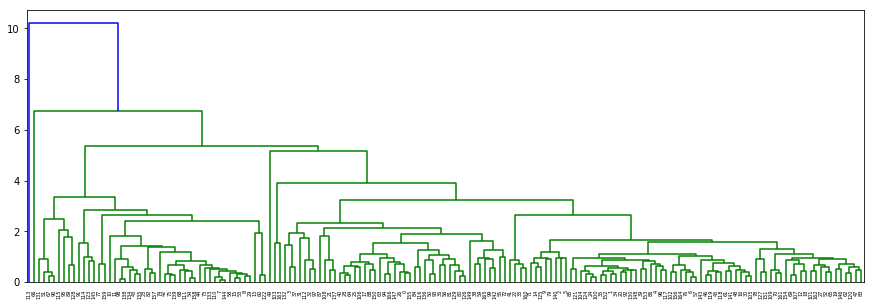

In [1401]:
#Average linkage
mergings= linkage(grouped_scaled,method='average',metric='euclidean')
plt.figure(figsize=[15,5])
dendrogram(mergings)
plt.show()

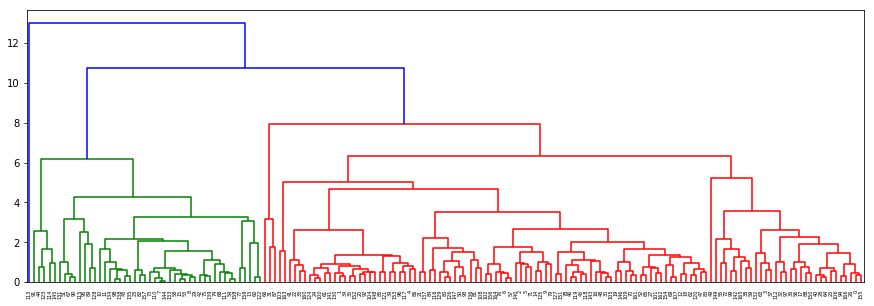

In [1432]:
#complete linkage
mergings= linkage(grouped_scaled,method='complete',metric='euclidean')
plt.figure(figsize=[15,5])
dendrogram(mergings)
plt.show()

In [1433]:
#Since cut_tree will result in an array let's reshape
Hcluster_label=cut_tree(mergings,n_clusters=3).reshape(-1,)

In [1434]:
df['H_Cluster']=Hcluster_label

In [1435]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,H_Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


### Statistical Analysis for Clusters using Hierarchical Classification


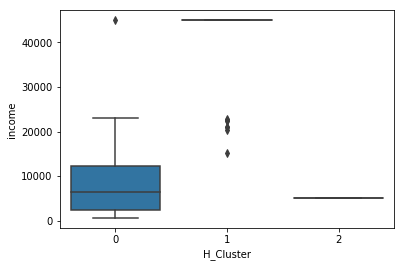

In [1436]:
#Checking income
sns.boxplot(x=df.H_Cluster,y=df.income)

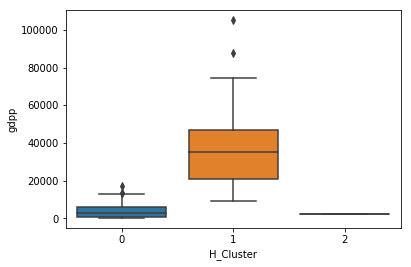

In [1429]:
sns.boxplot(x=df.H_Cluster,y=df.gdpp)

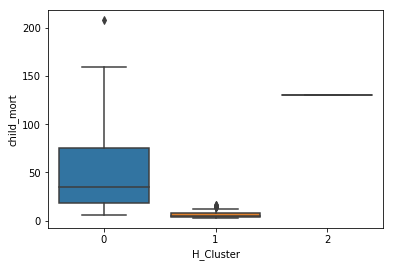

In [1437]:
sns.boxplot(x=df.H_Cluster,y=df.child_mort)

### Top 10 Countries that require aid as per Hierarchical Classification

In [1479]:
TopHier=df.loc[df.H_Cluster==0,:].sort_values(ascending=[False,True,True],by=['child_mort','gdpp','income'])[:10]
TopHier

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,H_Cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0


In [ ]:
df.Cluster_ID=df.Cluster_ID.map({0:"Developed",1:"Developing",2:'Need aid'})

### Top 10 Countries that require aid, as per Kmeans

In [1480]:
Top_KMeans=df.loc[df.Cluster_ID==2,:].sort_values(ascending=[False,True,True],by=['child_mort','gdpp','income'])[:10]
Top_KMeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,H_Cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,2,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0


In [1519]:
df.Cluster_ID=df.Cluster_ID.map({0:"Developed",1:"Developing",2:'Need aid'})

### Visualisation with the Clusters formed with K-Means clustering

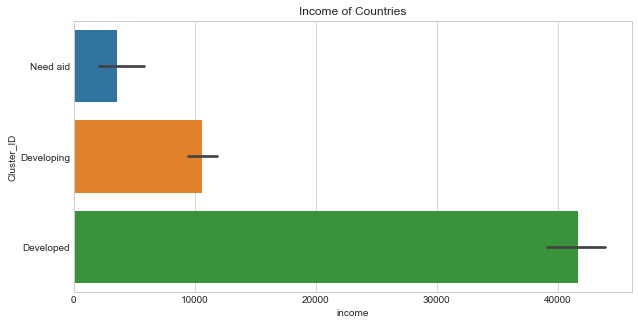

In [1529]:
plt.figure(figsize=[10,5])
sns.barplot(x=df.income,y=df.Cluster_ID)
plt.title("Income of Countries")
plt.show()

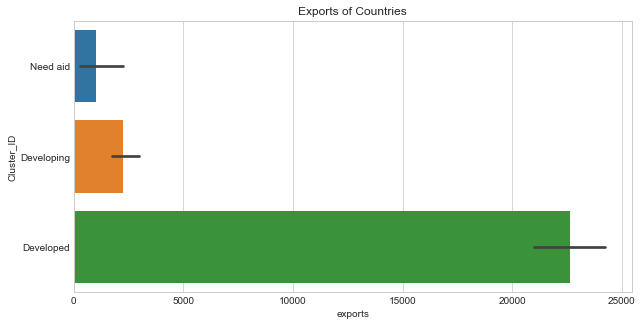

In [1545]:
plt.figure(figsize=[10,5])
sns.barplot(x=df.exports,y=df.Cluster_ID)
plt.title("Exports of Countries")
plt.show()

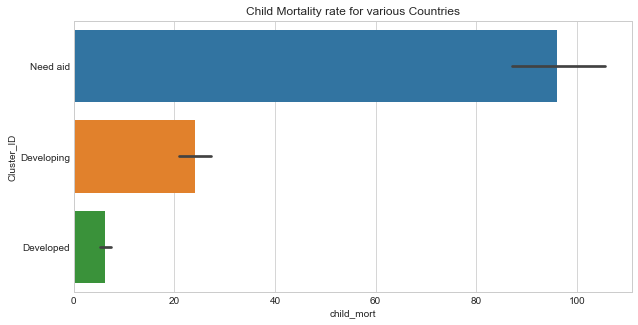

In [1546]:
plt.figure(figsize=[10,5])
sns.barplot(x=df.child_mort,y=df.Cluster_ID)
plt.title("Child Mortality rate for various Countries")
plt.show()

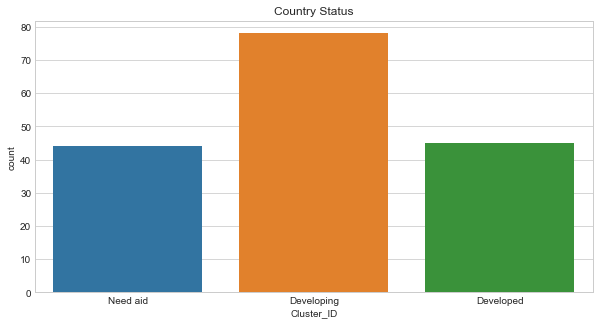

In [1548]:
plt.figure(figsize=[10,5])
sns.countplot(df.Cluster_ID)
plt.title("Country Status")
plt.show()

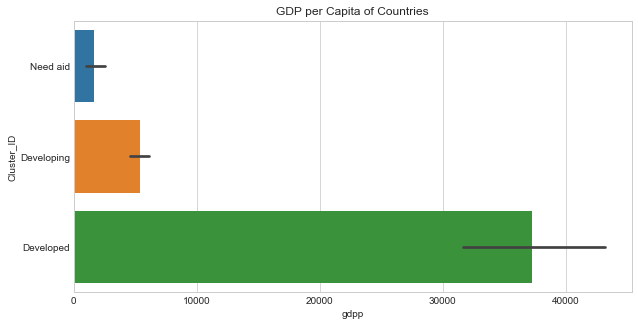

In [1549]:
plt.figure(figsize=[10,5])
sns.barplot(x=df.gdpp,y=df.Cluster_ID)
plt.title("GDP per Capita of Countries")
plt.show()

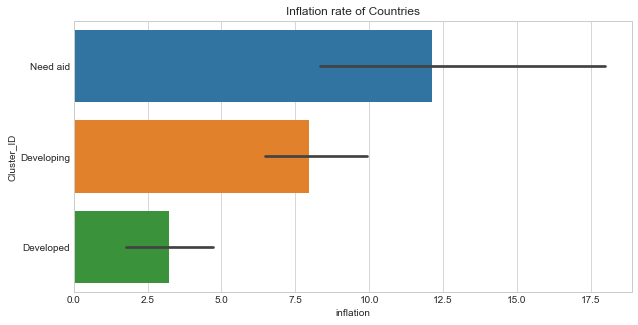

In [1554]:
plt.figure(figsize=[10,5])
sns.barplot(x=df.inflation,y=df.Cluster_ID)
plt.title("Inflation rate of Countries")
plt.show()

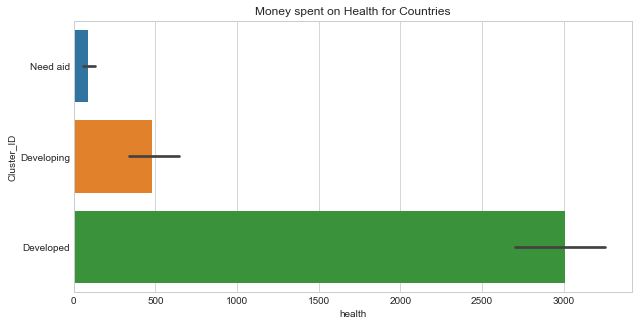

In [1550]:
plt.figure(figsize=[10,5])
sns.barplot(x=df.health,y=df.Cluster_ID)
plt.title("Money spent on Health for Countries")
plt.show()

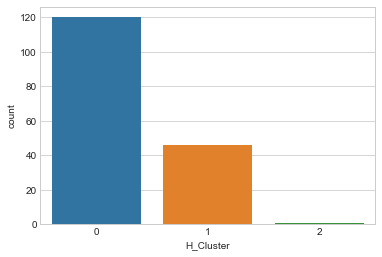

In [1517]:
sns.countplot(df.H_Cluster)

## Top 5 Countries in direst need of aid

__Sierra Leone__, __Central African Republic__, __Niger__, __Guinea Bissau__, __Congo, Dem. Rep.__